## Import Libraries for data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

C:\Users\94777\AppData\Local\Temp\ipykernel_22036\2625918399.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load data from csv
data = pd.read_csv(r'Data/Extracted_Features.csv')
data.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,Energy,RMS Energy,Intensity,Tempo,aggressiveness
0,-529.32556,56.663666,-16.689976,10.855888,-11.516223,-2.507931,-7.963574,-9.494851,-8.698105,-0.036879,-6.527728,-0.497543,-8.345603,11.823792,0.008446,0.158349,129.199219,1
1,-524.56635,46.049990,-16.909632,8.005425,-15.289064,-5.817219,-12.548594,-13.388479,-13.296664,-3.257975,-8.200781,-7.511373,-6.971085,16.592800,0.009717,0.193986,103.359375,1
2,-578.78170,55.583350,-28.597880,14.529802,-9.815604,-9.733731,-16.221111,-8.463774,-11.442408,3.533854,-13.033244,-1.500476,-7.094681,3.107531,0.004660,0.073526,129.199219,1
3,-528.16720,66.707400,-13.227976,17.019470,-7.077435,0.111632,1.816460,-6.667839,-7.203587,-0.767913,-7.369389,-2.316086,-6.510938,20.119280,0.011225,0.160906,151.999081,1
4,-478.66300,87.138830,-18.956570,15.749694,-7.600982,-5.742515,-18.325740,-18.957066,-12.290488,0.335987,-11.296300,-1.785710,-2.543035,19.658274,0.011913,0.105626,95.703125,1


In [3]:
# Devide to indipendant and dependant variables
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [4]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=1)

In [5]:
x_train

array([[-4.08858430e+02,  4.18567800e+01, -1.47962240e+01, ...,
         2.81905940e-02,  1.91884310e-01,  1.23046875e+02],
       [-2.65977230e+02,  1.35308650e+02, -5.20495130e+00, ...,
         1.00350320e-01,  9.49760440e-01,  1.84570312e+02],
       [-4.22991520e+02,  1.38997470e+02,  1.34979340e+01, ...,
         1.46692520e-02,  1.61590020e-01,  1.61499023e+02],
       ...,
       [-6.54625900e+02,  5.38855400e+01, -1.96120800e+01, ...,
         2.82855590e-03,  4.05833460e-02,  1.17453835e+02],
       [-3.05065460e+02,  1.45380260e+02, -1.51944530e+01, ...,
         5.00949660e-02,  4.64817170e-01,  1.43554688e+02],
       [-3.95559540e+02,  5.65383760e+01,  7.89690260e-01, ...,
         2.77578900e-02,  2.32265500e-01,  2.34907670e+02]])

In [6]:
# Get the data count of unique labels
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))


{0: 1413, 1: 1389}

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2802, 17), (935, 17), (2802,), (935,))

In [8]:
# Scale data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
# import pickle
# # Save the scaler
# with open('Models//scaler_3.pickle', 'wb') as f:
#     pickle.dump(sc, f)

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2802, 17), (935, 17), (2802,), (935,))

In [10]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2802, 17, 1), (935, 17, 1), (2802,), (935,))

## Modeling

#### Import Libraries for Model

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv1D,MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [13]:
intializer = tf.keras.initializers.glorot_normal(seed=None)

In [14]:
model = Sequential()
model.add(Conv1D(128, 5,padding='same',
                input_shape=(17,1),kernel_initializer=intializer))
model.add(Activation('relu'))

model.add(Conv1D(512, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv1D(512, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv1D(512, 5,padding='same',kernel_initializer=intializer))
model.add(Flatten())

model.add(Dense(1))
model.add(Activation('sigmoid'))

d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 17, 128)           768       
                                                                 
 activation (Activation)     (None, 17, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 512)           328192    
                                                                 
 activation_1 (Activation)   (None, 17, 512)           0         
                                                                 
 dropout (Dropout)           (None, 17, 512)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 17, 128)           327808    
                                                                 
 activation_2 (Activation)   (None, 17, 128)           0

In [16]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              optimizer=Adam(learning_rate=0.00005))

In [17]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=128)

Epoch 1/100


22/22 [==============================] - 4s 101ms/step - loss: 0.6865 - accuracy: 0.6071 - val_loss: 0.6706 - val_accuracy: 0.8278
Epoch 2/100
22/22 [==============================] - 2s 86ms/step - loss: 0.6346 - accuracy: 0.7687 - val_loss: 0.5195 - val_accuracy: 0.8246
Epoch 3/100
22/22 [==============================] - 2s 87ms/step - loss: 0.4329 - accuracy: 0.8319 - val_loss: 0.3680 - val_accuracy: 0.8513
Epoch 4/100
22/22 [==============================] - 2s 86ms/step - loss: 0.3559 - accuracy: 0.8494 - val_loss: 0.3185 - val_accuracy: 0.8706
Epoch 5/100
22/22 [==============================] - 2s 87ms/step - loss: 0.3197 - accuracy: 0.8701 - val_loss: 0.2894 - val_accuracy: 0.8866
Epoch 6/100
22/22 [==============================] - 2s 88ms/step - loss: 0.2977 - accuracy: 0.8787 - val_loss: 0.2796 - val_accuracy: 0.8930
Epoch 7/100
22/22 [==============================] - 2s 90ms/step - loss: 0.2772 - accuracy: 0.8904 - val_loss: 0.2790 - val_accuracy: 0.8898
Epo

In [18]:
def show_graphs(history):
    epochs = [i for i in range(100)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

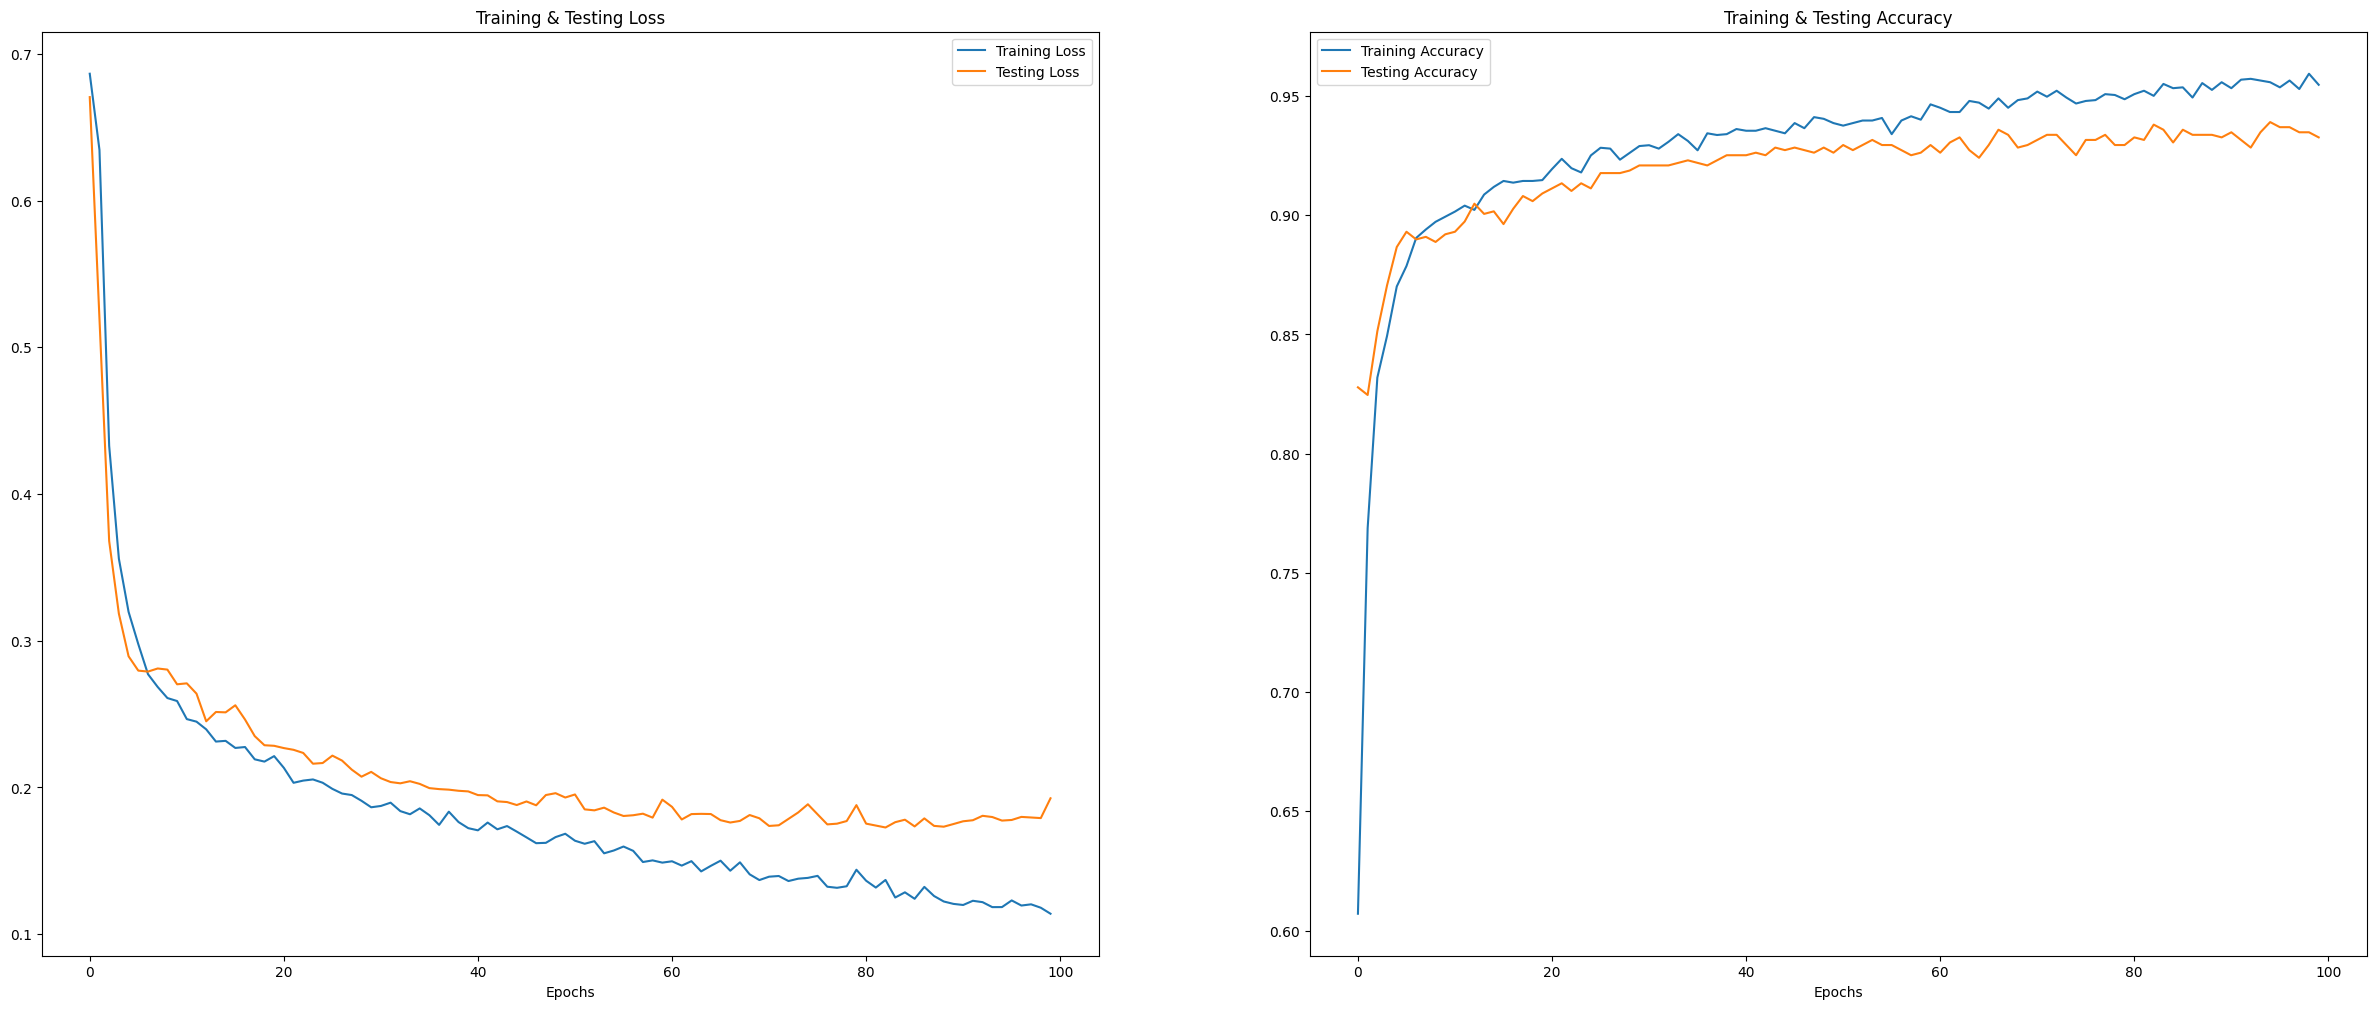

In [19]:
show_graphs(model.history)

In [20]:
y_pred = model.predict(x_test)

30/30 [==============================] - 0s 9ms/step


In [21]:
y_pred = np.array([1 if y>=0.9 else 0 for y in y_pred]) #Threshold

In [23]:
y_train_pred = model.predict(x_train)
y_train_pred = np.array([1 if y>=0.9 else 0 for y in y_train_pred]) #Threshold

88/88 [==============================] - 1s 8ms/step


In [24]:
# Print training and testing accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_pred)
print('Training Accuracy: ', training_accuracy)
print('Testing Accuracy: ', testing_accuracy)

Training Accuracy:  0.9314775160599572
Testing Accuracy:  0.9144385026737968


### Conlusion

As we can see Training Accuracy is higher than the Tesing accuracy. Because of that and studying the loss and accuracy curves, we can say the model is overfitted

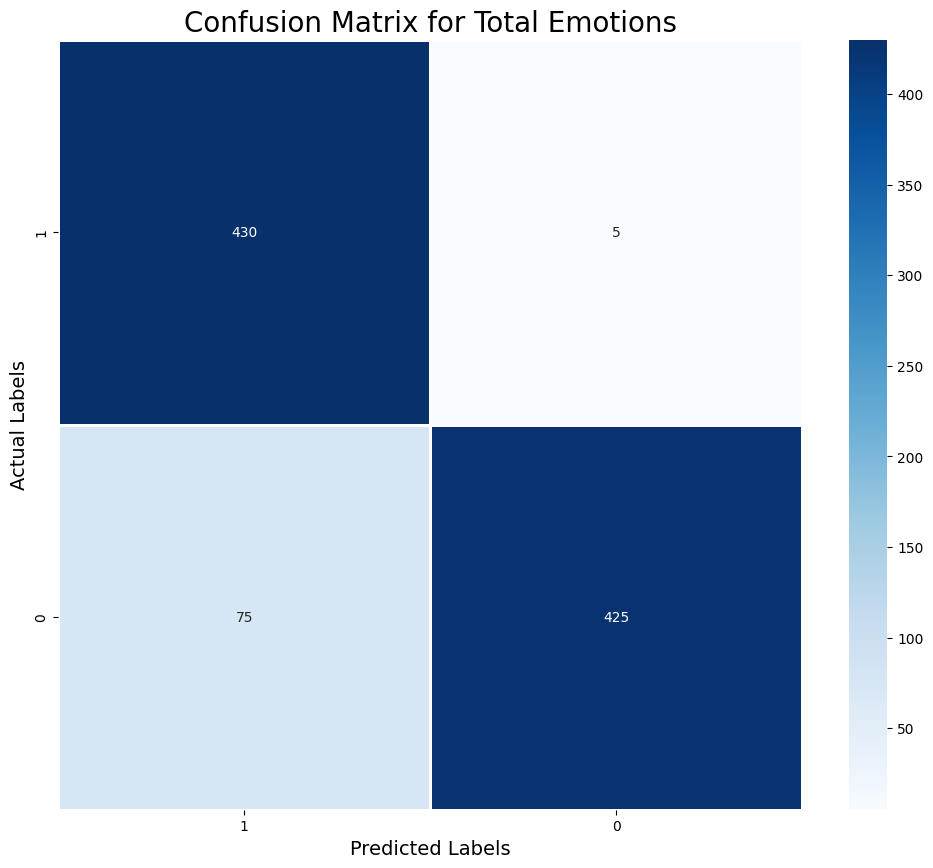

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [1,0] , columns = [1,0])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Total Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       435
           1       0.99      0.85      0.91       500

    accuracy                           0.91       935
   macro avg       0.92      0.92      0.91       935
weighted avg       0.92      0.91      0.91       935



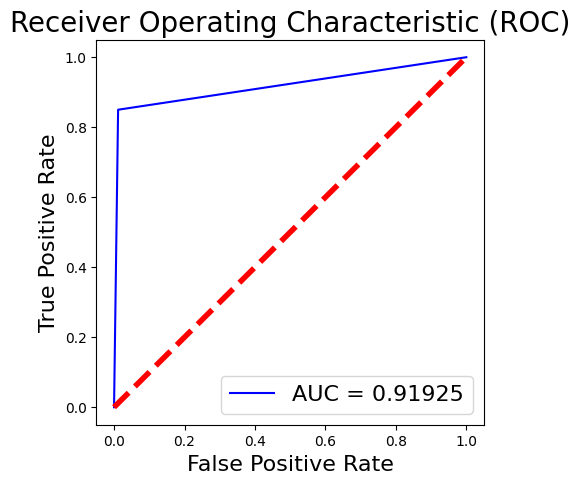

In [27]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic (ROC)', size=20)
plt.plot(fpr, tpr, color='blue', label='AUC = %0.5f' % roc_auc)
plt.legend(loc='lower right', prop={'size': 16})
plt.plot([0, 1], [0, 1], linestyle='--', color='red', linewidth=4, label='Random Chance')
plt.axis('tight')
plt.ylabel('True Positive Rate', size=16)
plt.xlabel('False Positive Rate', size=16)
plt.show()

### Testing

In [28]:
import librosa

In [38]:
def extract_mfcc(signal, sample_rate=22050, n_mfcc=13, n_fft=2048, hop_length=512):
    features = []
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    features.extend(np.mean(mfccs.T, axis=0))
    features.append(np.sum(np.abs(signal)**2))
    features.append(librosa.feature.rms(y=signal)[0].mean())
    features.append(np.max(np.abs(signal)))
    features.append(librosa.beat.beat_track(y=signal, sr=22050)[0])
    return np.array(features)

In [39]:
signal, sample_rate = librosa.load("denoised__non_agg_audio.wav", sr=22050)

In [40]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [41]:
model.predict(features)

1/1 [==============================] - 0s 29ms/step


array([[0.99976844]], dtype=float32)

In [42]:
signal, sample_rate = librosa.load("denoised__agg_audio.wav", sr=22050)

In [43]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [44]:
model.predict(features)

1/1 [==============================] - 0s 32ms/step


array([[0.9999904]], dtype=float32)

In [38]:
# # Save model
# model.save('Models/cnn_model_3.h5')

d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
